In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
def perform_eda(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Display first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())
    print()
    
    # Display summary statistics
    print("Summary statistics:")
    print(df.describe())
    print()
    
    # Display information about the DataFrame
    print("Information about the DataFrame:")
    print(df.info())


In [3]:
def create_plots(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Plot age group distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='AgeGroup')
    plt.title('Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.show()
    
    # Plot gender distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Gender')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
    
    # Plot ethnicity distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Ethnicity')
    plt.title('Ethnicity Distribution')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.show()
    
    # Plot subgroups created by different combinations of columns
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x='AgeGroup', hue='Gender', palette='muted')
    plt.title('Age Group Distribution by Gender')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x='AgeGroup', hue='Ethnicity', palette='muted')
    plt.title('Age Group Distribution by Ethnicity')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Ethnicity')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x='Gender', hue='Ethnicity', palette='muted')
    plt.title('Gender Distribution by Ethnicity')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Ethnicity')
    plt.show()


In [4]:
def retrieve_image_path(videoname, agegroup, data_root, split):
    imagename = videoname.replace('mp4', 'jpg')
    return os.path.join(data_root, split, str(agegroup), imagename )

def plot_images_by_permutation(csv_file, data_root, split='train'):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Create permutations of AgeGroup, Gender, and Ethnicity
    permutations = df.groupby(['AgeGroup', 'Gender', 'Ethnicity']).apply(lambda x: x.sample(1)).reset_index(drop=True)
    
    # Plot images for each permutation
    for index, row in permutations.iterrows():
        age_group = row['AgeGroup']
        gender = row['Gender']
        ethnicity = row['Ethnicity']
        
        plt.figure(figsize=(4, 4))
        plt.title(f'AgeGroup: {age_group}, Gender: {gender}, Ethnicity: {ethnicity}')
        
        # Retrieve and display image for the current permutation
        videoname = row['VideoName']        
        image_path = retrieve_image_path(videoname, age_group, data_root, split)

        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        
        plt.show()
            


In [5]:
# Path to the CSV file
csv_file = "/home/georg/projects/university/C5/multimodal_dataset/First_Impressions_v3_multimodal/test_set_age_labels.csv"
split='test'
class_mappings = {'Gender':{1:'male', 2:'female'},
                  'Ethnicity':{1:'asian', 2:'european', 3:'african'}}
# Perform exploratory data analysis
perform_eda(csv_file)

First few rows of the DataFrame:
             VideoName       UserID  AgeGroup  Gender  Ethnicity
0  -9BZ8A9U7TE.000.mp4  -9BZ8A9U7TE         1       2          2
1  -9BZ8A9U7TE.002.mp4  -9BZ8A9U7TE         1       2          2
2  -9BZ8A9U7TE.003.mp4  -9BZ8A9U7TE         1       2          2
3  -9BZ8A9U7TE.004.mp4  -9BZ8A9U7TE         1       2          2
4  3ZwXifihvtA.000.mp4  3ZwXifihvtA         1       1          2

Summary statistics:
          AgeGroup       Gender    Ethnicity
count  1975.000000  1975.000000  1975.000000
mean      4.060253     1.537215     2.064304
std       0.876298     0.498739     0.387778
min       1.000000     1.000000     1.000000
25%       4.000000     1.000000     2.000000
50%       4.000000     2.000000     2.000000
75%       5.000000     2.000000     2.000000
max       7.000000     2.000000     3.000000

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 5 columns):
 #   Column

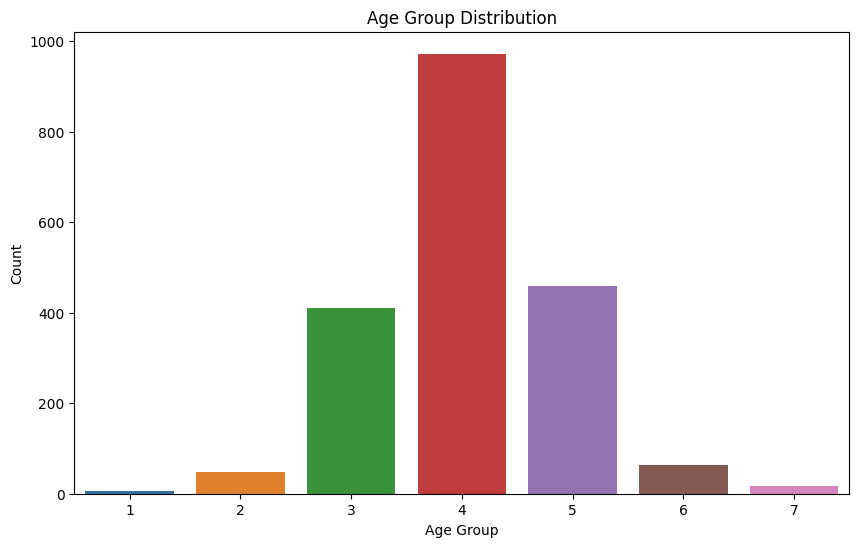

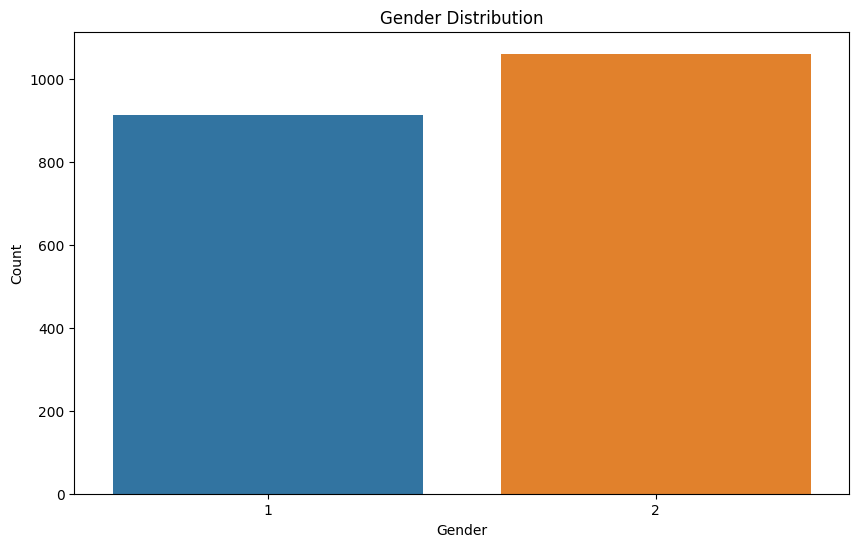

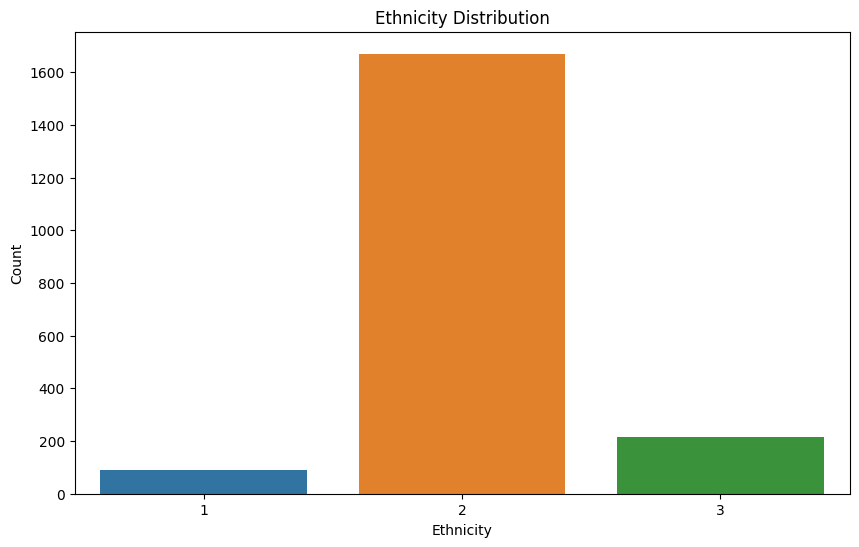

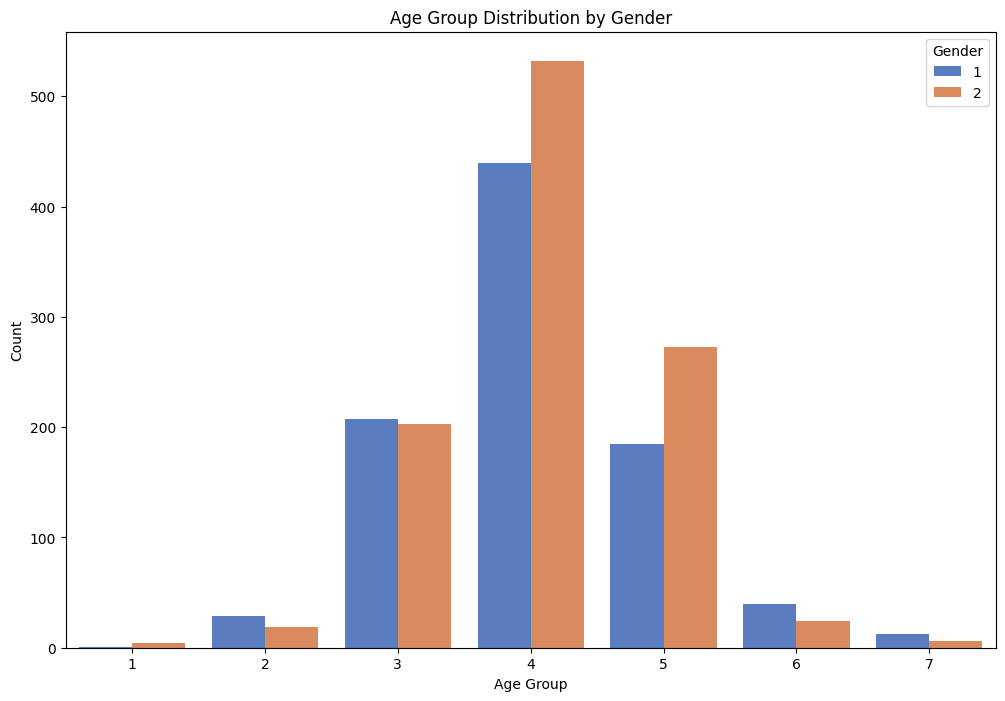

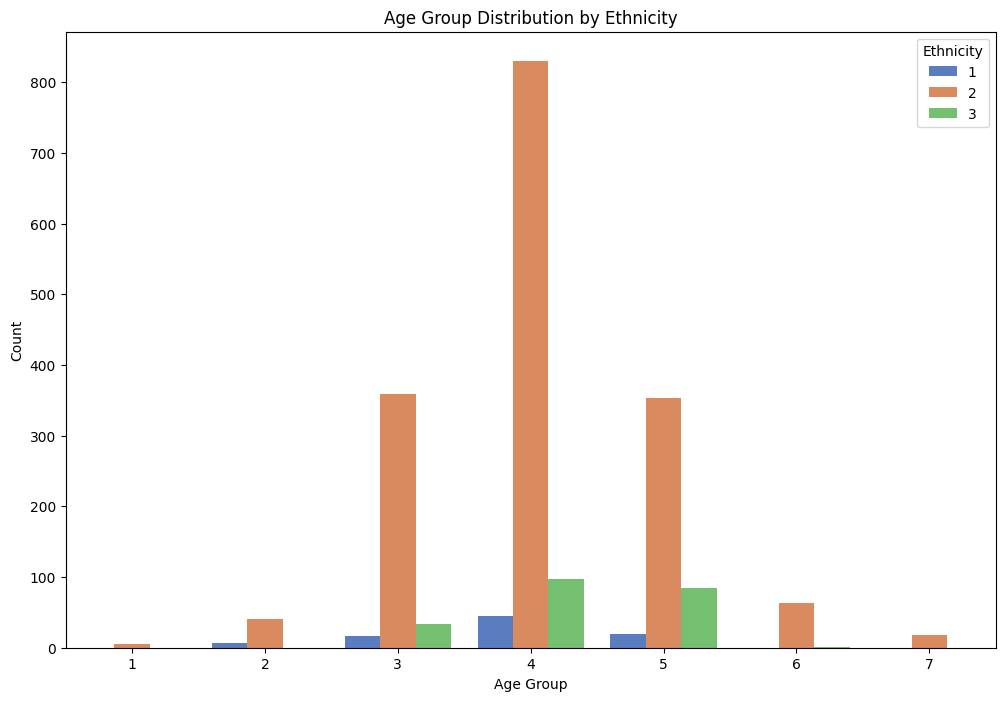

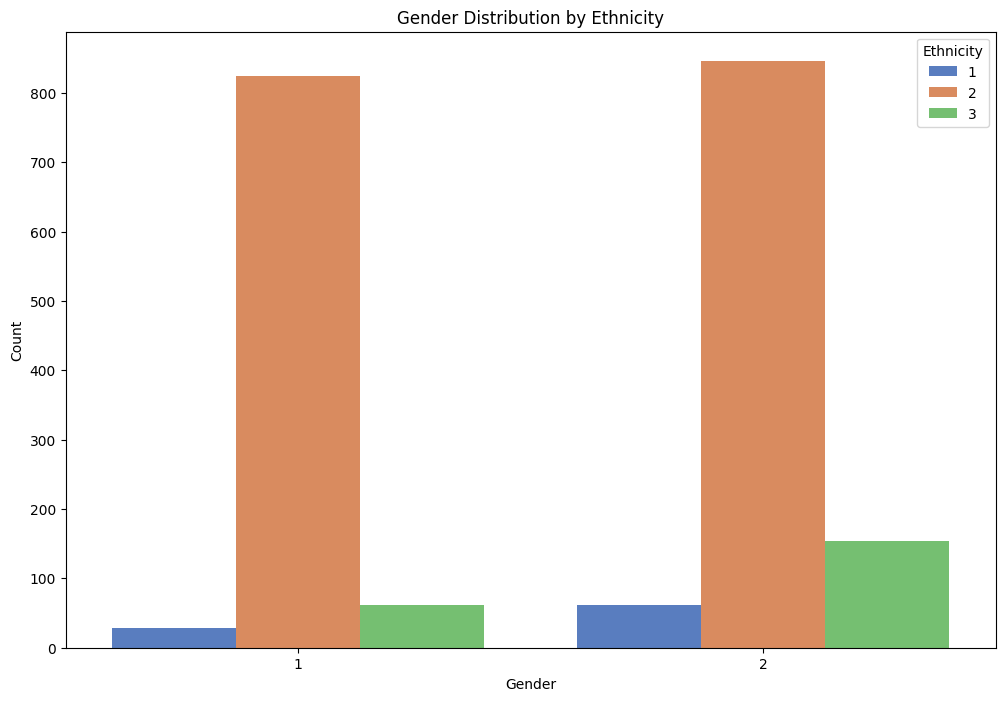

In [6]:
create_plots(csv_file)


/tmp/ipykernel_44669/3796498453.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  permutations = df.groupby(['AgeGroup', 'Gender', 'Ethnicity']).apply(lambda x: x.sample(1)).reset_index(drop=True)


FileNotFoundError: [Errno 2] No such file or directory: '/home/georg/projects/university/C5/multimodal_dataset/First_Impressions_v3_multimodal/train/1/3ZwXifihvtA.000.jpg'

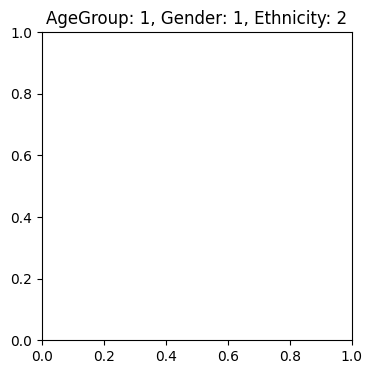

In [8]:

# Plot images by permutation
plot_images_by_permutation(csv_file, 
                           data_root='/home/georg/projects/university/C5/multimodal_dataset/First_Impressions_v3_multimodal', 
                           split='train')